image1.avif

In this project, I took data from the [TruthSeeker2023](https://www.unb.ca/cic/datasets/truthseeker-2023.html) website and this data contains correct and false tweets, the data contains a large number of Features, but I was satisfied with taking the tweet address and its text only



1.   majority_target - Truth value of the tweet
2.   statement - Headline of a new article
3.   tweet - twitter posts related to the associated manual keywords






# Collecting data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r"C:\Users\User\Downloads\Features_For_Traditional_ML_Techniques.csv")
df.head()

,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,...,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,...,0,1,0,0,0,0,3,0,4,10
3,3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,1,3,0,0,1,6,8,1,30
4,4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,...,0,1,3,0,1,0,11,3,2,19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              134198 non-null  int64  
 1   majority_target         134198 non-null  bool   
 2   statement               134198 non-null  object 
 3   BinaryNumTarget         134198 non-null  float64
 4   tweet                   134198 non-null  object 
 5   followers_count         134198 non-null  float64
 6   friends_count           134198 non-null  float64
 7   favourites_count        134198 non-null  float64
 8   statuses_count          134198 non-null  float64
 9   listed_count            134198 non-null  float64
 10  following               134198 non-null  float64
 11  embeddings              134198 non-null  object 
 12  BotScore                134198 non-null  float64
 13  BotScoreBinary          134198 non-null  float64
 14  cred                

In [ ]:
df.isnull().sum()

Unnamed: 0         0
majority_target    0
statement          0
BinaryNumTarget    0
tweet              0
                  ..
ampersand          0
capitals           0
digits             0
long_word_freq     0
short_word_freq    0
Length: 64, dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.columns

Index(['Unnamed: 0', 'majority_target', 'statement', 'BinaryNumTarget',
       'tweet', 'followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'listed_count', 'following', 'embeddings', 'BotScore',
       'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes',
       'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count',
       'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage',
       'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage',
       'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage',
       'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage',
       'EVENT_percentage', 'TIME_percentage', 'LOC_percentage',
       'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage',
       'Word count', 'Max word length', 'Min word length',
       'Average word length', 'present_verbs', 'past_verbs', 'adjectives',
       'adverbs', 'adpositions', 'pronouns', 'TOs', 'deter

In [ ]:
df["majority_target"].value_counts()

True     68985
False    65213
Name: majority_target, dtype: int64

## Explore data balance

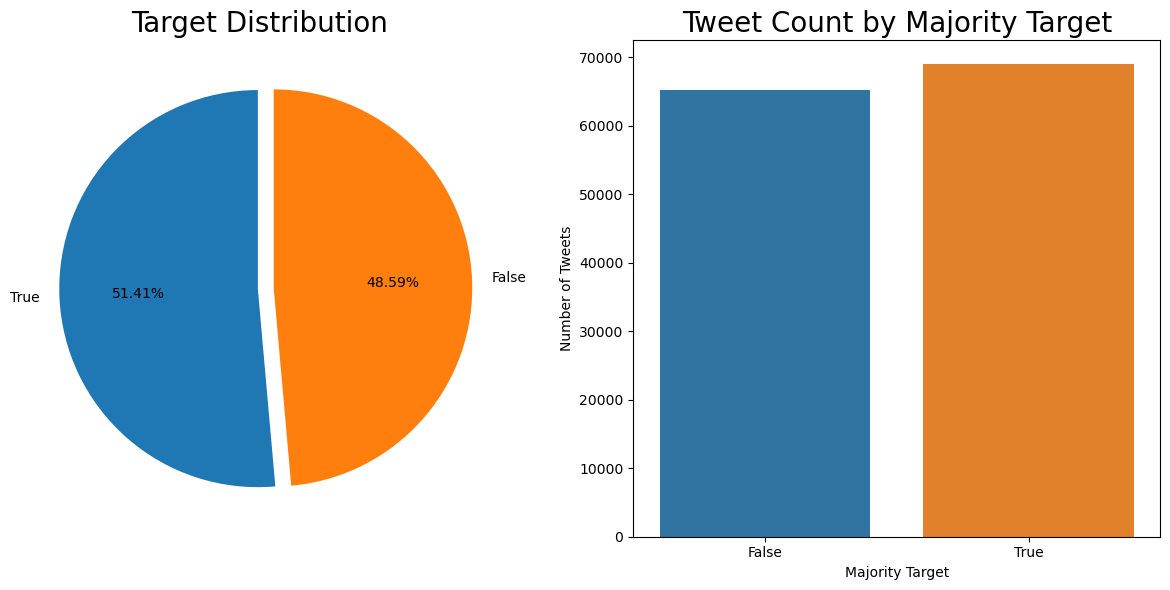

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
target_counts = df["majority_target"].value_counts()
plt.pie(
    target_counts,
    labels=target_counts.index,
    autopct="%1.2f%%",
    explode=[0.01, 0.07],
    startangle=90
)
plt.title("Target Distribution",size=20)

plt.subplot(1, 2, 2)
sns.countplot(x='majority_target', data=df)
plt.title('Tweet Count by Majority Target',size=20)
plt.xlabel('Majority Target')
plt.ylabel('Number of Tweets')

plt.tight_layout()
plt.show()


## Take "statement", "tweet" as features and "majority_target" as label

In [ ]:
df_1 = df[["statement", "tweet", "majority_target"]]
df_1.head()

,statement,tweet,majority_target
0,End of eviction moratorium means millions of A...,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,True
1,End of eviction moratorium means millions of A...,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,True
2,End of eviction moratorium means millions of A...,THE SUPREME COURT is siding with super rich pr...,True
3,End of eviction moratorium means millions of A...,@POTUS Biden Blunders\n\nBroken campaign promi...,True
4,End of eviction moratorium means millions of A...,@OhComfy I agree. The confluence of events rig...,True


In [ ]:
#df_1.to_csv('new_dataframe.csv', index=False)

In [ ]:
#df_1=pd.read_csv("new_dataframe.csv")

# Preprocessing data

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## remove stopwords and punctuations

In [ ]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_data(text):
  text =''.join([char for char in text if char not in string.punctuation])
  text=' '.join([word for word in text.split() if word not in stopwords.words('english')])
  text=text.lower()
  words = word_tokenize(text)
  return " ".join(words)

df_1["cleaned_text"] = df_1["tweet"].apply(preprocess_data)
df_1["cleaned_statement"] = df_1["statement"].apply(preprocess_data)

df_1.head()


,statement,tweet,majority_target,cleaned_text,cleaned_statement
0,End of eviction moratorium means millions of A...,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,True,potus biden blunders 6 month update inflation ...,end eviction moratorium means millions america...
1,End of eviction moratorium means millions of A...,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,True,s0sickrick stairmaster 6d6f636869 not many peo...,end eviction moratorium means millions america...
2,End of eviction moratorium means millions of A...,THE SUPREME COURT is siding with super rich pr...,True,the supreme court siding super rich property o...,end eviction moratorium means millions america...
3,End of eviction moratorium means millions of A...,@POTUS Biden Blunders\n\nBroken campaign promi...,True,potus biden blunders broken campaign promises ...,end eviction moratorium means millions america...
4,End of eviction moratorium means millions of A...,@OhComfy I agree. The confluence of events rig...,True,ohcomfy i agree the confluence events right un...,end eviction moratorium means millions america...


In [ ]:
#df_1.to_csv('new_dataframe_1.csv', index=False)

In [ ]:
#df_1=pd.read_csv(r"C:\Users\User\Downloads\new_dataframe_1.csv")

## text length before and after preprocessing

In [ ]:
df_1["statement_length"] = df_1["statement"].apply(lambda x:len(x.split()))
df_1["cleaned_statement_length"] = df_1["cleaned_statement"].apply(lambda x:len(x.split()))
df_1["tweet_length"] = df_1["tweet"].apply(lambda x:len(x.split()))
df_1["cleaned_tweet_length"] = df_1["cleaned_text"].apply(lambda x:len(x.split()))

In [ ]:
df_1.head()

,statement,tweet,majority_target,cleaned_text,cleaned_statement,statement_length,cleaned_statement_length,tweet_length,cleaned_tweet_length
0,End of eviction moratorium means millions of A...,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,True,potus biden blunders 6 month update inflation ...,end eviction moratorium means millions america...,18,11,40,33
1,End of eviction moratorium means millions of A...,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,True,s0sickrick stairmaster 6d6f636869 not many peo...,end eviction moratorium means millions america...,18,11,44,26
2,End of eviction moratorium means millions of A...,THE SUPREME COURT is siding with super rich pr...,True,the supreme court siding super rich property o...,end eviction moratorium means millions america...,18,11,35,23
3,End of eviction moratorium means millions of A...,@POTUS Biden Blunders\n\nBroken campaign promi...,True,potus biden blunders broken campaign promises ...,end eviction moratorium means millions america...,18,11,37,34
4,End of eviction moratorium means millions of A...,@OhComfy I agree. The confluence of events rig...,True,ohcomfy i agree the confluence events right un...,end eviction moratorium means millions america...,18,11,35,25


## **---WordCloud---** before and after preprocessing**

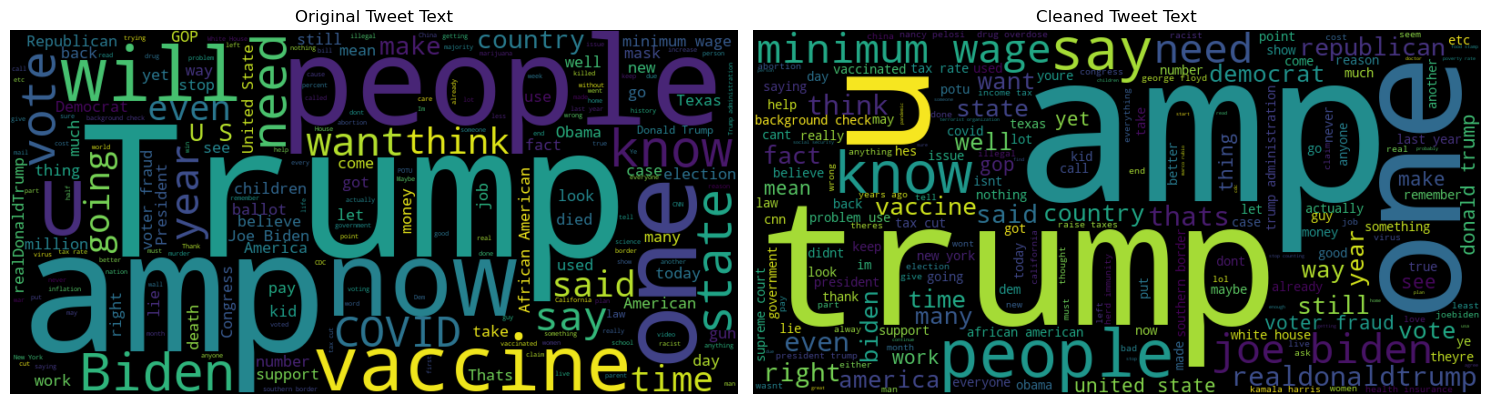

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 7))

ax1 = fig.add_subplot(1, 2, 1)
text = " ".join(df_1["tweet"].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords=STOPWORDS).generate(text)
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis("off")
ax1.set_title("Original Tweet Text")

ax2 = fig.add_subplot(1, 2, 2)
text_cleaned = " ".join(df_1["cleaned_text"].astype(str).tolist())
wordcloud_cleaned = WordCloud(width=800, height=400, background_color="black", stopwords=STOPWORDS).generate(text_cleaned)
ax2.imshow(wordcloud_cleaned, interpolation='bilinear')
ax2.axis("off")
ax2.set_title("Cleaned Tweet Text")

plt.tight_layout()
plt.show()


## Lemmetization AND Stemmer for texts

In [ ]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer

def get_lemmatized(text):
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in text.split()]
  return " ".join(lemmatized_words)

df_1["lemmatized_tweet"] = df_1["cleaned_text"].apply(get_lemmatized)
df_1["lemmatized_statement"] = df_1["cleaned_statement"].apply(get_lemmatized)

def get_stemmed(text):
  stemmer = SnowballStemmer('english')
  stemmed_words = [stemmer.stem(word) for word in text.split()]
  return " ".join(stemmed_words)

df_1["stemmed_tweet"] = df_1["lemmatized_tweet"].apply(get_stemmed)
df_1["stemmed_statement"] = df_1["lemmatized_statement"].apply(get_stemmed)

df_1.head()

,statement,tweet,majority_target,cleaned_text,cleaned_statement,statement_length,cleaned_statement_length,tweet_length,cleaned_tweet_length,lemmatized_tweet,lemmatized_statement,stemmed_tweet,stemmed_statement
0,End of eviction moratorium means millions of A...,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,True,potus biden blunders 6 month update inflation ...,end eviction moratorium means millions america...,18,11,40,33,potus biden blunder 6 month update inflation d...,end eviction moratorium mean million american ...,potus biden blunder 6 month updat inflat delta...,end evict moratorium mean million american cou...
1,End of eviction moratorium means millions of A...,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,True,s0sickrick stairmaster 6d6f636869 not many peo...,end eviction moratorium means millions america...,18,11,44,26,s0sickrick stairmaster 6d6f636869 not many peo...,end eviction moratorium mean million american ...,s0sickrick stairmast 6d6f636869 not mani peopl...,end evict moratorium mean million american cou...
2,End of eviction moratorium means millions of A...,THE SUPREME COURT is siding with super rich pr...,True,the supreme court siding super rich property o...,end eviction moratorium means millions america...,18,11,35,23,the supreme court siding super rich property o...,end eviction moratorium mean million american ...,the suprem court side super rich properti owne...,end evict moratorium mean million american cou...
3,End of eviction moratorium means millions of A...,@POTUS Biden Blunders\n\nBroken campaign promi...,True,potus biden blunders broken campaign promises ...,end eviction moratorium means millions america...,18,11,37,34,potus biden blunder broken campaign promise in...,end eviction moratorium mean million american ...,potus biden blunder broken campaign promis inf...,end evict moratorium mean million american cou...
4,End of eviction moratorium means millions of A...,@OhComfy I agree. The confluence of events rig...,True,ohcomfy i agree the confluence events right un...,end eviction moratorium means millions america...,18,11,35,25,ohcomfy i agree the confluence event right unp...,end eviction moratorium mean million american ...,ohcomfi i agre the confluenc event right unpre...,end evict moratorium mean million american cou...


In [ ]:
df_2= df_1[["statement","statement_length","cleaned_statement","cleaned_statement_length","tweet",
        "tweet_length","cleaned_text","cleaned_tweet_length","lemmatized_tweet","lemmatized_statement","stemmed_tweet","stemmed_statement","majority_target"]]
df_2.head()

,statement,statement_length,cleaned_statement,cleaned_statement_length,tweet,tweet_length,cleaned_text,cleaned_tweet_length,lemmatized_tweet,lemmatized_statement,stemmed_tweet,stemmed_statement,majority_target
0,End of eviction moratorium means millions of A...,18,end eviction moratorium means millions america...,11,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,40,potus biden blunders 6 month update inflation ...,33,potus biden blunder 6 month update inflation d...,end eviction moratorium mean million american ...,potus biden blunder 6 month updat inflat delta...,end evict moratorium mean million american cou...,True
1,End of eviction moratorium means millions of A...,18,end eviction moratorium means millions america...,11,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,44,s0sickrick stairmaster 6d6f636869 not many peo...,26,s0sickrick stairmaster 6d6f636869 not many peo...,end eviction moratorium mean million american ...,s0sickrick stairmast 6d6f636869 not mani peopl...,end evict moratorium mean million american cou...,True
2,End of eviction moratorium means millions of A...,18,end eviction moratorium means millions america...,11,THE SUPREME COURT is siding with super rich pr...,35,the supreme court siding super rich property o...,23,the supreme court siding super rich property o...,end eviction moratorium mean million american ...,the suprem court side super rich properti owne...,end evict moratorium mean million american cou...,True
3,End of eviction moratorium means millions of A...,18,end eviction moratorium means millions america...,11,@POTUS Biden Blunders\n\nBroken campaign promi...,37,potus biden blunders broken campaign promises ...,34,potus biden blunder broken campaign promise in...,end eviction moratorium mean million american ...,potus biden blunder broken campaign promis inf...,end evict moratorium mean million american cou...,True
4,End of eviction moratorium means millions of A...,18,end eviction moratorium means millions america...,11,@OhComfy I agree. The confluence of events rig...,35,ohcomfy i agree the confluence events right un...,25,ohcomfy i agree the confluence event right unp...,end eviction moratorium mean million american ...,ohcomfi i agre the confluenc event right unpre...,end evict moratorium mean million american cou...,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_1["majority_target"] = le.fit_transform(df_1["majority_target"])
df_1.head()

,statement,tweet,majority_target,cleaned_text,cleaned_statement,statement_length,cleaned_statement_length,tweet_length,cleaned_tweet_length,lemmatized_tweet,lemmatized_statement,stemmed_tweet,stemmed_statement
0,End of eviction moratorium means millions of A...,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,1,potus biden blunders 6 month update inflation ...,end eviction moratorium means millions america...,18,11,40,33,potus biden blunder 6 month update inflation d...,end eviction moratorium mean million american ...,potus biden blunder 6 month updat inflat delta...,end evict moratorium mean million american cou...
1,End of eviction moratorium means millions of A...,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1,s0sickrick stairmaster 6d6f636869 not many peo...,end eviction moratorium means millions america...,18,11,44,26,s0sickrick stairmaster 6d6f636869 not many peo...,end eviction moratorium mean million american ...,s0sickrick stairmast 6d6f636869 not mani peopl...,end evict moratorium mean million american cou...
2,End of eviction moratorium means millions of A...,THE SUPREME COURT is siding with super rich pr...,1,the supreme court siding super rich property o...,end eviction moratorium means millions america...,18,11,35,23,the supreme court siding super rich property o...,end eviction moratorium mean million american ...,the suprem court side super rich properti owne...,end evict moratorium mean million american cou...
3,End of eviction moratorium means millions of A...,@POTUS Biden Blunders\n\nBroken campaign promi...,1,potus biden blunders broken campaign promises ...,end eviction moratorium means millions america...,18,11,37,34,potus biden blunder broken campaign promise in...,end eviction moratorium mean million american ...,potus biden blunder broken campaign promis inf...,end evict moratorium mean million american cou...
4,End of eviction moratorium means millions of A...,@OhComfy I agree. The confluence of events rig...,1,ohcomfy i agree the confluence events right un...,end eviction moratorium means millions america...,18,11,35,25,ohcomfy i agree the confluence event right unp...,end eviction moratorium mean million american ...,ohcomfi i agre the confluenc event right unpre...,end evict moratorium mean million american cou...


In [ ]:
df_1["combined_text"] = df_1["stemmed_tweet"] + " " + df_1["stemmed_statement"]
df_1.head(2)

,statement,tweet,majority_target,cleaned_text,cleaned_statement,statement_length,cleaned_statement_length,tweet_length,cleaned_tweet_length,lemmatized_tweet,lemmatized_statement,stemmed_tweet,stemmed_statement,combined_text
0,End of eviction moratorium means millions of A...,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,1,potus biden blunders 6 month update inflation ...,end eviction moratorium means millions america...,18,11,40,33,potus biden blunder 6 month update inflation d...,end eviction moratorium mean million american ...,potus biden blunder 6 month updat inflat delta...,end evict moratorium mean million american cou...,potus biden blunder 6 month updat inflat delta...
1,End of eviction moratorium means millions of A...,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1,s0sickrick stairmaster 6d6f636869 not many peo...,end eviction moratorium means millions america...,18,11,44,26,s0sickrick stairmaster 6d6f636869 not many peo...,end eviction moratorium mean million american ...,s0sickrick stairmast 6d6f636869 not mani peopl...,end evict moratorium mean million american cou...,s0sickrick stairmast 6d6f636869 not mani peopl...


In [ ]:
#df_1.to_csv('new_dataframe_3.csv', index=False)
#df_2.to_csv('new_dataframe_2.csv', index=False)

In [ ]:
#df_1=pd.read_csv("new_dataframe_3.csv")

# preparing data for ML models

## Using TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(df_1["combined_text"])
#X_tfidf_array = X_tfidf.toarray()
y=df_1["majority_target"]

print(X_tfidf.shape)
print(y.shape)


(134198, 174299)
(134198,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
"""from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)"""

'from sklearn.svm import SVC\nfrom sklearn.metrics import accuracy_score\n\nsvm = SVC()\nsvm.fit(X_train, y_train)\ny_pred = svm.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)'

In [ ]:
"""from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
svm = LinearSVC(C=1.0, class_weight="balanced", max_iter=10000)  # Linear kernel
svm.fit(X_train, y_train)  # Trains in minutes, not hours
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))"""

Accuracy: 0.9544709388971684


## training Logistic Regression using TF-IDF

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

joblib.dump(model, 'logistic_model.pkl')

Accuracy: 0.9535394932935917

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     13059
           1       0.95      0.96      0.95     13781

    accuracy                           0.95     26840
   macro avg       0.95      0.95      0.95     26840
weighted avg       0.95      0.95      0.95     26840



['logistic_model.pkl']

In [ ]:
model = joblib.load('logistic_model.pkl')

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9535394932935917


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_tfidf_tweet = tfidf_vectorizer.fit_transform(df_1["stemmed_tweet"])
#X_tfidf_array = X_tfidf.toarray()
y_tweet=df_1["majority_target"]

print(X_tfidf_tweet.shape)
print(y_tweet.shape)

#*******************************************************************************#
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tfidf_tweet, y_tweet, test_size=0.2, random_state=42)

model_tweet = LogisticRegression(max_iter=1000)
model_tweet.fit(X_train_t, y_train_t)

y_pred_tweet = model_tweet.predict(X_test_t)

print("Accuracy:", accuracy_score(y_test_t, y_pred_tweet))
print("\nClassification Report:\n", classification_report(y_test_t, y_pred_tweet))

joblib.dump(model_tweet, 'logistic_model_tweet.pkl')




(134198, 174242)
(134198,)
Accuracy: 0.9315573770491803

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     13059
           1       0.93      0.94      0.93     13781

    accuracy                           0.93     26840
   macro avg       0.93      0.93      0.93     26840
weighted avg       0.93      0.93      0.93     26840



['logistic_model_tweet.pkl']

## compare the accuracy with and without statement feature

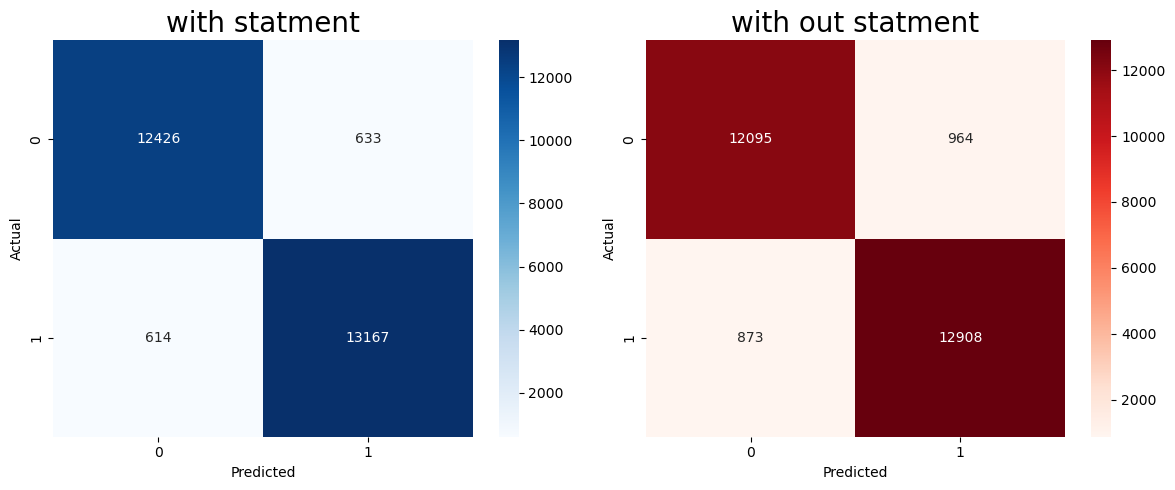

In [ ]:
from sklearn.metrics import confusion_matrix


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("with statment",size=20)
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

cm_tweet = confusion_matrix(y_test_t, y_pred_tweet)
sns.heatmap(cm_tweet, annot=True, fmt='d', ax=axes[1], cmap='Reds')
axes[1].set_title("with out statment",size=20)
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# Train LSTM model

## see the 95% percentile distribution of words to decide the best value of **(maxlen)**

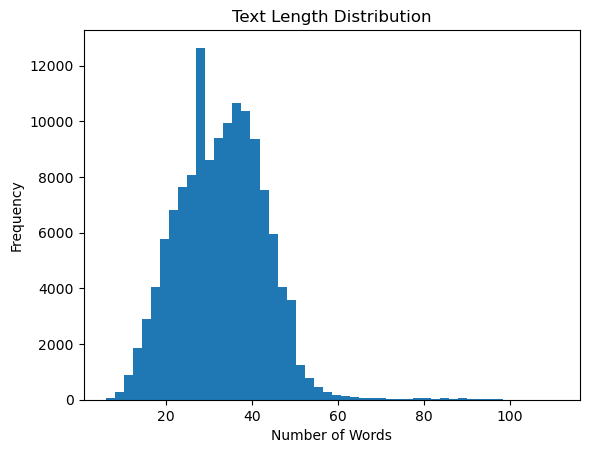

95th Percentile: 48.0
Max Length: 111


In [ ]:
text_lengths = [len(text.split()) for text in df_1["combined_text"]]

import matplotlib.pyplot as plt
plt.hist(text_lengths, bins=50)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

print("95th Percentile:", np.percentile(text_lengths, 95))
print("Max Length:", max(text_lengths))


## Building the model and training

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

texts = df_1["combined_text"].astype(str).values
labels = df_1["majority_target"].values

encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

X_train_texts, X_test_texts, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_texts)
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

maxlen = 50
X_train = pad_sequences(X_train_seq, maxlen=maxlen)
X_test = pad_sequences(X_test_seq, maxlen=maxlen)

In [ ]:
X_train.shape

(107358, 50)

In [ ]:
X_test.shape

(26840, 50)

In [ ]:
from tensorflow.keras.layers import SpatialDropout1D


MAX_NB_WORDS = 20000
EMBEDDING_DIM = 128

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 128)           2560000   
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2609473 (9.95 MB)
Trainable params: 2609473 (9.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    min_delta=0.0001,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/10
1678/1678 [==============================] - 292s 174ms/step - loss: 0.1767 - accuracy: 0.9563 - val_loss: 0.1770 - val_accuracy: 0.9572
Epoch 2/10
1678/1678 [==============================] - 320s 191ms/step - loss: 0.1733 - accuracy: 0.9569 - val_loss: 0.1780 - val_accuracy: 0.9569
Epoch 3/10
1678/1678 [==============================] - 317s 189ms/step - loss: 0.1689 - accuracy: 0.9573 - val_loss: 0.1797 - val_accuracy: 0.9569
Epoch 4/10
1678/1678 [==============================] - 308s 184ms/step - loss: 0.1624 - accuracy: 0.9584 - val_loss: 0.1886 - val_accuracy: 0.9550


In [ ]:
#model.save("lstm_tweet_model.h5")

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#from tensorflow.keras.models import load_model
#model = load_model("lstm_tweet_model.h5")

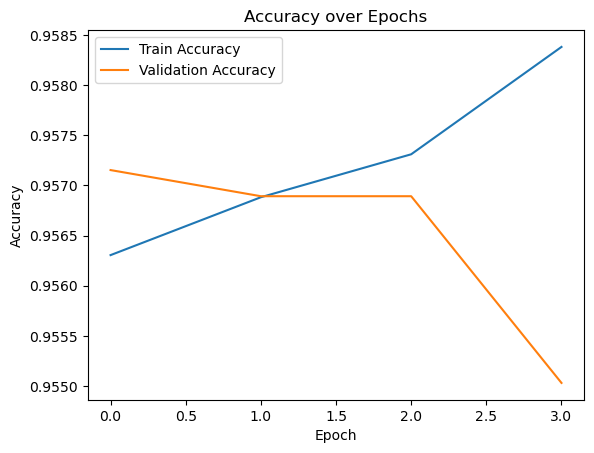

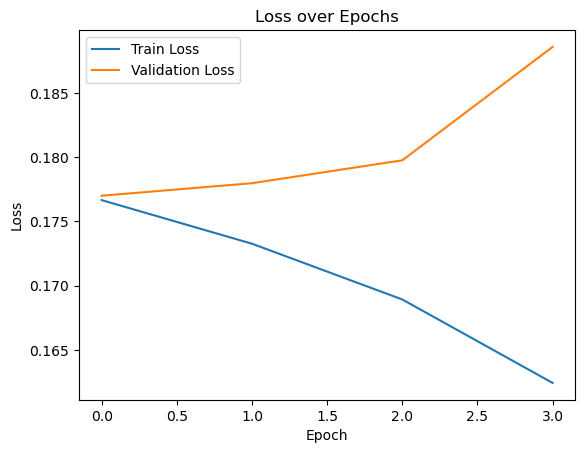

In [ ]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


839/839 [==============================] - 15s 17ms/step


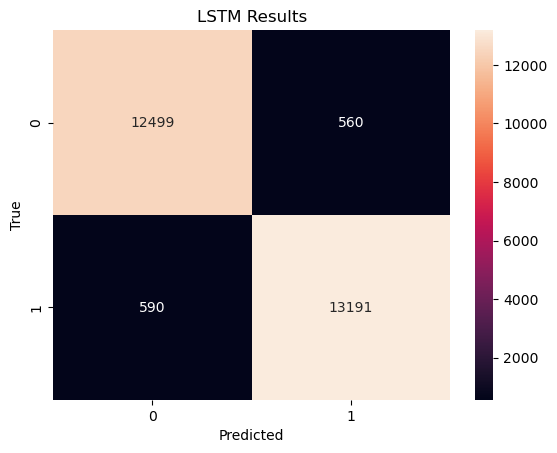

Accuracy: 0.9571535022354695

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     13059
           1       0.96      0.96      0.96     13781

    accuracy                           0.96     26840
   macro avg       0.96      0.96      0.96     26840
weighted avg       0.96      0.96      0.96     26840



In [ ]:
y_pred_lstm = model.predict(X_test)

y_pred_lstm = (y_pred_lstm > 0.5).astype(int)

cm_lstm = confusion_matrix(y_test, y_pred_lstm)

sns.heatmap(cm_lstm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("LSTM Results")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lstm))

In [ ]:
def pred_tweets(text):
    sequence = tokenizer.texts_to_sequences([text])

    padded_sequence = pad_sequences(sequence, maxlen=50)

    prediction = model.predict(padded_sequence)

    label = (prediction > 0.5).astype(int)[0][0]
    if label == 1:
        print("Predicted label: TRUE")
    else:
        print("Predicted label: FALSE")


In [ ]:
text = "Breaking: Scientists confirm the Earth is flat and gravity is a hoax. #FlatEarth #WakeUp"
#text = "This is an example of the input you want to classify"
pred_tweets(text)


## testing using postman

In [ ]:
# In a Jupyter cell
from flask import Flask, request, jsonify
import threading
import numpy as np

app = Flask(__name__)

@app.route('/predict', methods=['GET'])
def predict():
    data = request.get_json()
    text = data['text']

    sequence = tokenizer.texts_to_sequences([text])

    padded_sequence = pad_sequences(sequence, maxlen=50)

    prediction = model.predict(padded_sequence)

    label = (prediction > 0.5).astype(int)[0][0]
    if label == 1:
        print("Predicted label: TRUE")
    else:
        print("Predicted label: FALSE")
    return jsonify({'prediction': result})
if __name__ == '__main__':
    app.run(port=5000)

# Run Flask in background thread
thread = threading.Thread(target=run_app)
thread.start()


 * Serving Flask app '__main__'
 * Debug mode: off
 * Serving Flask app '__main__'


 * Debug mode: off



 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Running on http://127.0.0.1:5001
Press CTRL+C to quit


In [ ]:
import pickle

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
